In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [2]:
# There are three ways of using Naive Bayes :
# 1) Gaussian NB (for a normal distributed data)
# 2) Bernouli NB (for Binomial data(Boolean data) , yes no and 0-1 type)
# 3) Multinomial NB (for descrete data or textual data)

In [3]:
dataset = pd.read_csv("placement-dataset.csv")
dataset.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [4]:
#data cleaning:


In [5]:
dataset = dataset.drop(columns=["city"])
dataset.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,NaN,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
dataset.isnull().sum()

cgpa         8
iq           4
placement    0
dtype: int64

In [8]:
dataset["cgpa"].fillna(dataset["cgpa"].mean(),inplace=True)
dataset["iq"].fillna(dataset["iq"].mean(),inplace=True)

C:\Users\santo\AppData\Local\Temp\ipykernel_11952\1847608138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["cgpa"].fillna(dataset["cgpa"].mean(),inplace=True)
C:\Users\santo\AppData\Local\Temp\ipykernel_11952\1847608138.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [9]:
dataset.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

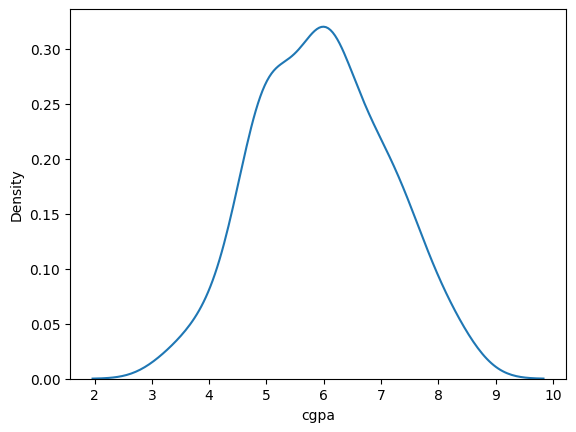

In [14]:
#lets check if data is normal distributed or not:
sns.kdeplot(data=dataset["cgpa"])
plt.show()

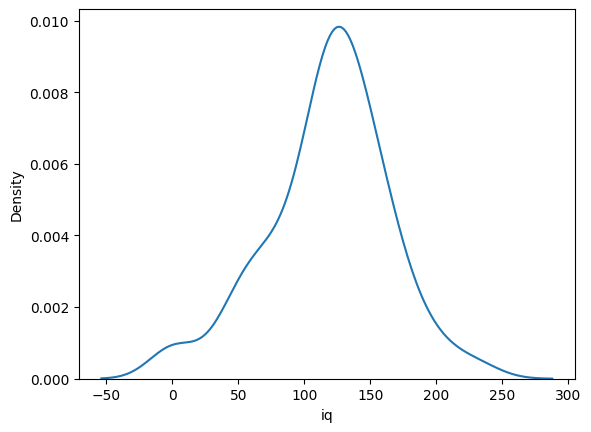

In [15]:
sns.kdeplot(data=dataset["iq"])
plt.show()

In [16]:
# split data into input and output:
x = dataset.iloc[:,:-1]
y = dataset["placement"]

In [22]:
#splittinng the train and test data:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=46)

In [23]:
#now lets apply naive bayes
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

# Gaussian NB

In [24]:
gnb = GaussianNB()

In [25]:
gnb.fit(x_train,y_train)

GaussianNB()

In [26]:
# the model is trained with gaussian Nb now lets check the accuracy:
gnb.score(x_test,y_test)*100

95.0

In [39]:
#hence we have a 95% accuracy with Gaussian Nb

C:\Users\santo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


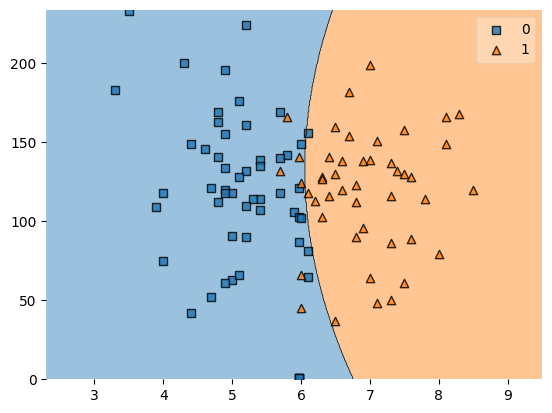

In [47]:
#lets see this using the decision region also:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=gnb)
plt.show()

# Bernoulli NB

In [28]:
bnb = BernoulliNB()

In [29]:
bnb.fit(x_train,y_train)

BernoulliNB()

In [31]:
bnb.score(x_test,y_test)*100

45.0

In [32]:
# with Bernoulli NB we have the accuracy of only 45%

C:\Users\santo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


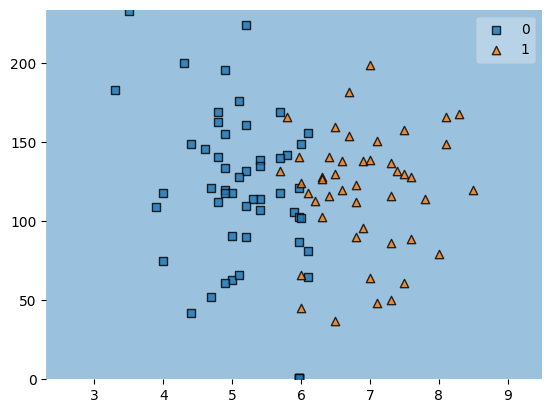

In [48]:
#lets see this using the decision region also:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=bnb)
plt.show()

# Multinomial NB

In [33]:
mnb = MultinomialNB()

In [34]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [36]:
mnb.score(x_test,y_test)*100

50.0

In [37]:
# and with multinomial NB we have accuracy of 50%

C:\Users\santo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


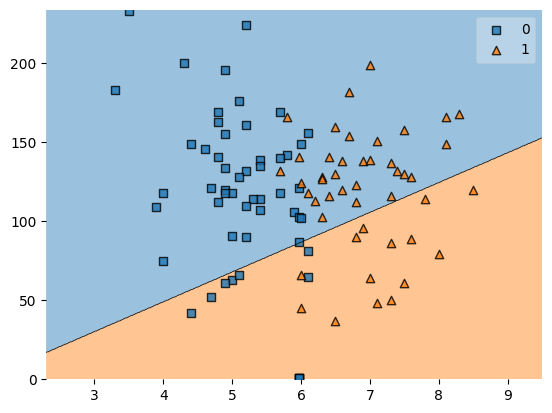

In [49]:
#lets see this using the decision region also:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=mnb)
plt.show()